In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_excel(r"C:\Users\pamme\Downloads\SuperStoreUS-2015.xlsx")

In [5]:
df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


###### What is the total revenue generated by the store?

In [9]:
# Calculate total revenue
total_revenue = df["Sales"].sum()

print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $1924337.88


##### Which category of products contributes the most to sales?

In [12]:
# Group by product category and sum sales
category_sales = df.groupby("Product Category")["Sales"].sum()

# Find the category with the highest sales
top_category = category_sales.idxmax()
top_category_sales = category_sales.max()

print(f"Top Product Category: {top_category}")
print(f"Total Sales: ${top_category_sales:.2f}")

Top Product Category: Technology
Total Sales: $712264.95


#####  How has the sales trend been for the past year?

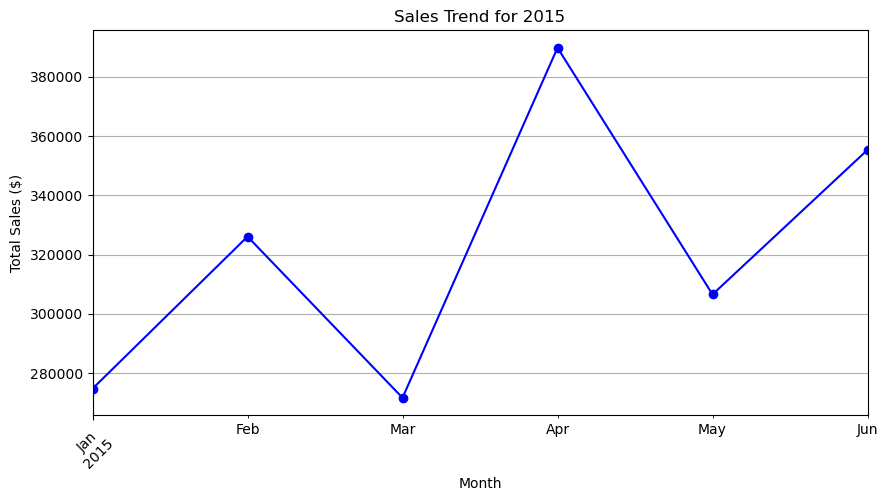

In [15]:
# Convert 'Order Date' to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Extract month and year for grouping
df["Year-Month"] = df["Order Date"].dt.to_period("M")

# Aggregate sales by month
monthly_sales = df.groupby("Year-Month")["Sales"].sum()

# Plot the sales trend
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker="o", linestyle="-", color="b")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend for 2015")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### Which region has the highest sales and which one has the lowest?

In [18]:
# Group by region and sum sales
region_sales = df.groupby("Region")["Sales"].sum()

# Find the region with the highest and lowest sales
highest_region = region_sales.idxmax()
highest_sales = region_sales.max()

lowest_region = region_sales.idxmin()
lowest_sales = region_sales.min()

print(f"Region with Highest Sales: {highest_region} (${highest_sales:.2f})")
print(f"Region with Lowest Sales: {lowest_region} (${lowest_sales:.2f})")

Region with Highest Sales: East ($592171.49)
Region with Lowest Sales: South ($357105.12)


######  What is the average profit margin of the store?

In [21]:
# Calculate total profit and total sales
total_profit = df["Profit"].sum()
total_sales = df["Sales"].sum()

# Calculate average profit margin
average_profit_margin = (total_profit / total_sales) * 100

print(f"Average Profit Margin: {average_profit_margin:.2f}%")

Average Profit Margin: 11.64%
